In [1]:
import pandas as pd

# Merge 12 months of data into single csv

In [2]:
files = [file for file in os.listdir("./Sales_Data")]
full_df = pd.DataFrame()
for file in files:
    df = pd.read_csv(f"./Sales_Data/{file}")
    full_df = pd.concat([full_df, df])

full_df.head()
full_df.shape
full_df.to_csv("all_data.csv", index= False)

In [3]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


## Clean Data 

In [4]:
all_data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [5]:
# Drop null rows
na_df = all_data[all_data.isna()]
na_df.head()
all_data = all_data.dropna(how="all") ## remove the whole row since there are rows full with nan
all_data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

#### Find the 'Or' in Order Data and delete it

In [6]:
or_df = all_data[all_data["Order Date"].str[0:2] == "Or"]
or_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
254,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
705,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1101,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2875,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3708,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [7]:
all_data = all_data[all_data["Order Date"].str[0:2] != "Or"]

In [8]:
(all_data["Order Date"] == "Or" ).sum()

np.int64(0)

##       Augment data with additional columns

#### Add Month column

In [9]:
all_data["Month"] = all_data["Order Date"].str[0:2]
# convert the string to int
all_data["Month"] = all_data["Month"].astype("int32")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


#### Add Sales Column

In [10]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

In [11]:
## Convert Columns to correct type
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"]) # make int
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"]) # mkae float
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

In [12]:
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


#### Add a City Column

In [24]:
## 136 Church St, New York City, NY 10001 
## split: [[136 Church St] , [New York City], [NY 10001]]
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]
all_data["City"] = all_data["Purchase Address"].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


#### Analysis Question 1: What was the best month for sales? How much was earned that month?

In [13]:
results = all_data.groupby("Month").sum()[["Quantity Ordered", "Price Each", "Sales"]]
all_data.groupby("Month").sum()[["Quantity Ordered", "Price Each", "Sales"]].sort_values(by="Sales", ascending= False)

,Quantity Ordered,Price Each,Sales
Month,,,
12,28114,4588415.41,4613443.34
10,22703,3715554.83,3736726.88
4,20558,3367671.02,3390670.24
11,19798,3180600.68,3199603.20
5,18667,3135125.13,3152606.75
3,17005,2791207.83,2807100.38
7,16072,2632539.56,2647775.76
6,15253,2562025.61,2577802.26
8,13448,2230345.42,2244467.88


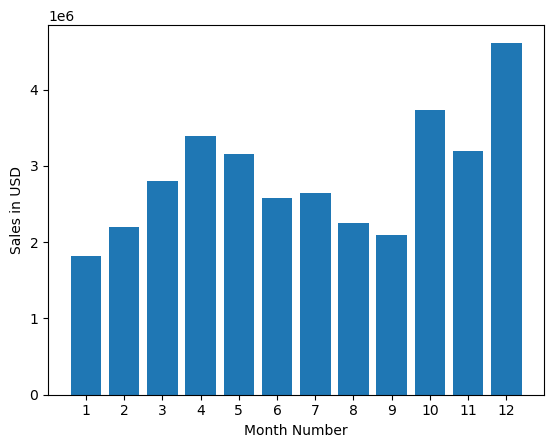

In [14]:
import matplotlib.pyplot as plt
months = range(1, 13)
plt.bar(months, results["Sales"])
plt.xticks(months)
plt.ylabel("Sales in USD")
plt.xlabel("Month Number")
plt.show()

## Question 1 Answer: Month 12

In [15]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


#### Analysis Question 2: What city had the highest number of sales?

In [25]:
city_res = all_data.groupby("City").sum()[["Sales"]]
all_data.groupby("City").sum()[["Sales"]].sort_values("Sales", ascending= False)

,Sales
City,
San Francisco (CA),8262203.91
Los Angeles (CA),5452570.80
New York City (NY),4664317.43
Boston (MA),3661642.01
Atlanta (GA),2795498.58
Dallas (TX),2767975.40
Seattle (WA),2747755.48
Portland (OR),1870732.34
Austin (TX),1819581.75


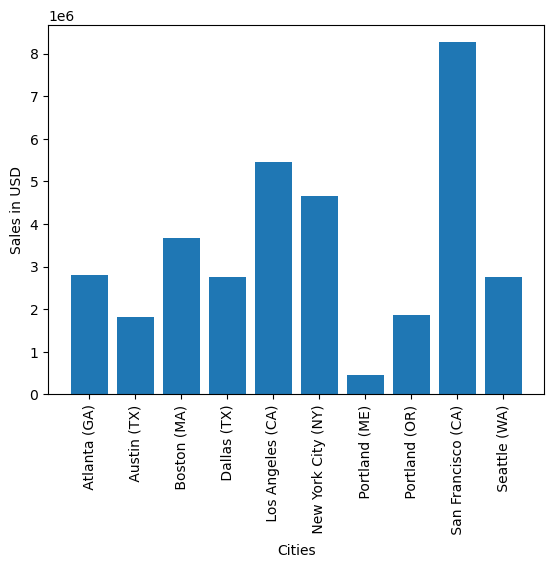

In [42]:
cities = [city for city, df in all_data.groupby("City")]
plt.bar(cities, city_res["Sales"])
plt.xticks(cities, rotation= "vertical", size= 10)
plt.ylabel("Sales in USD")
plt.xlabel("Cities")
plt.show()

## Question 2 Answer: San Francisco (CA) had the highest amount of sales

#### Analysis Question 3: What time should we display advertisements to maximize likelihood of customer's buying products?

In [43]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


In [47]:
## Convert the 'Order date' to date time object
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.0,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.0,New York City (NY)
1,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.0,New York City (NY)


In [49]:
# use dt.hour, min
all_data["Hour"] = all_data["Order Date"].dt.hour
all_data["Minute"] = all_data["Order Date"].dt.minute
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.0,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.0,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.0,New York City (NY),7,3


In [52]:
hours = [hour for hour, df in all_data.groupby("Hour")]
all_data.groupby("Hour").count().sort_values("Quantity Ordered", ascending= False)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Minute
Hour,,,,,,,,,,
19,12905,12905,12905,12905,12905,12905,12905,12905,12905,12905
12,12587,12587,12587,12587,12587,12587,12587,12587,12587,12587
11,12411,12411,12411,12411,12411,12411,12411,12411,12411,12411
18,12280,12280,12280,12280,12280,12280,12280,12280,12280,12280
20,12228,12228,12228,12228,12228,12228,12228,12228,12228,12228
13,12129,12129,12129,12129,12129,12129,12129,12129,12129,12129
14,10984,10984,10984,10984,10984,10984,10984,10984,10984,10984
10,10944,10944,10944,10944,10944,10944,10944,10944,10944,10944
21,10921,10921,10921,10921,10921,10921,10921,10921,10921,10921


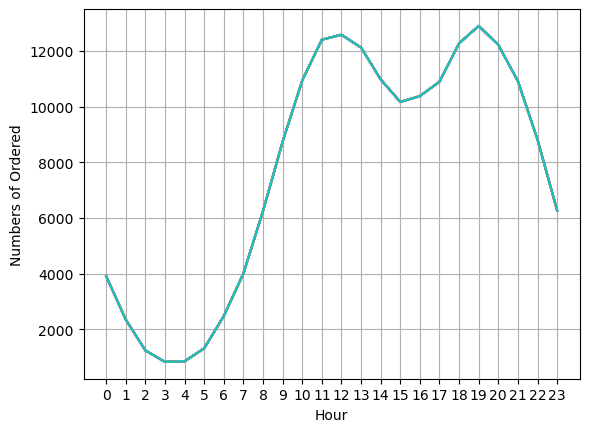

In [57]:
plt.plot(hours, all_data.groupby(["Hour"]).count())
plt.xlabel("Hour")
plt.ylabel("Numbers of Ordered")
plt.xticks(hours)
plt.grid()

#### Analysis Question 4 What products are commonly sold together?

In [63]:
## Same ID number means sold together
# Count duplicate order IDs to find which products were commonly sold together

## create dataframe for duplicate rows
duplicate_df = all_data[all_data["Order ID"].duplicated(keep = False)] # False so we keep all occurances of duplicates
duplicate_df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,Boston (MA),12,37
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,Boston (MA),12,37
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,Boston (MA),12,37
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,Boston (MA),12,37
36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,New York City (NY),14,32
37,295698,USB-C Charging Cable,2,11.95,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,23.90,New York City (NY),14,32
42,295703,AA Batteries (4-pack),1,3.84,2019-12-17 12:27:00,"502 Jefferson St, Austin, TX 73301",12,3.84,Austin (TX),12,27
43,295703,Bose SoundSport Headphones,1,99.99,2019-12-17 12:27:00,"502 Jefferson St, Austin, TX 73301",12,99.99,Austin (TX),12,27
66,295726,iPhone,1,700.00,2019-12-25 14:49:00,"203 Lakeview St, Boston, MA 02215",12,700.00,Boston (MA),14,49
67,295726,Lightning Charging Cable,1,14.95,2019-12-25 14:49:00,"203 Lakeview St, Boston, MA 02215",12,14.95,Boston (MA),14,49


In [68]:
duplicate_df["Grouped"] = duplicate_df.groupby("Order ID")["Product"].transform(lambda x: ", ".join(x))
duplicate_df.head()

/var/folders/pn/q5j5vdy93dl8lc0jhl8prcrh0000gn/T/ipykernel_41569/1343451014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicate_df["Grouped"] = duplicate_df.groupby("Order ID")["Product"].transform(lambda x: ", ".join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,Boston (MA),12,37,"Google Phone, USB-C Charging Cable, Bose Sound..."
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,Boston (MA),12,37,"Google Phone, USB-C Charging Cable, Bose Sound..."
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,Boston (MA),12,37,"Google Phone, USB-C Charging Cable, Bose Sound..."
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,Boston (MA),12,37,"Google Phone, USB-C Charging Cable, Bose Sound..."
36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,New York City (NY),14,32,"Vareebadd Phone, USB-C Charging Cable"


In [70]:
## Now drop the duplicate orders
duplicate_df = duplicate_df[['Order ID', 'Grouped']].drop_duplicates()
duplicate_df.head()

,Order ID,Grouped
16,295681,"Google Phone, USB-C Charging Cable, Bose Sound..."
36,295698,"Vareebadd Phone, USB-C Charging Cable"
42,295703,"AA Batteries (4-pack), Bose SoundSport Headphones"
66,295726,"iPhone, Lightning Charging Cable"
76,295735,"iPhone, Apple Airpods Headphones, Wired Headph..."


In [71]:
## Count pairs of what occurs most frequently
from collections import Counter
from itertools import combinations
count = Counter()
for row in duplicate_df["Grouped"]:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2))) # top 2 items sold together

for key, value in count.most_common(10):
    print(key, value)


('iPhone', ' Lightning Charging Cable') 1005
('Google Phone', ' USB-C Charging Cable') 987
('iPhone', ' Wired Headphones') 447
('Google Phone', ' Wired Headphones') 414
('Vareebadd Phone', ' USB-C Charging Cable') 361
('iPhone', ' Apple Airpods Headphones') 360
('Google Phone', ' Bose SoundSport Headphones') 220
('Vareebadd Phone', ' Wired Headphones') 143
(' USB-C Charging Cable', ' Wired Headphones') 120
('Vareebadd Phone', ' Bose SoundSport Headphones') 80


## Question 4 Answer: Iphone & Lightning Charging Cable

#### Analysis Question 5 What Product sold the most? 

In [72]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38


In [104]:
all_data.groupby("Product")[["Quantity Ordered", "Price Each", "Sales"]].sum().sort_values("Quantity Ordered",ascending= False)

,Quantity Ordered,Price Each,Sales
Product,,,
AAA Batteries (4-pack),31017,61716.59,92740.83
AA Batteries (4-pack),27635,79015.68,106118.40
USB-C Charging Cable,23975,261740.85,286501.25
Lightning Charging Cable,23217,323787.10,347094.15
Wired Headphones,20557,226395.18,246478.43
Apple Airpods Headphones,15661,2332350.00,2349150.00
Bose SoundSport Headphones,13457,1332366.75,1345565.43
27in FHD Monitor,7550,1125974.93,1132424.50
iPhone,6849,4789400.00,4794300.00


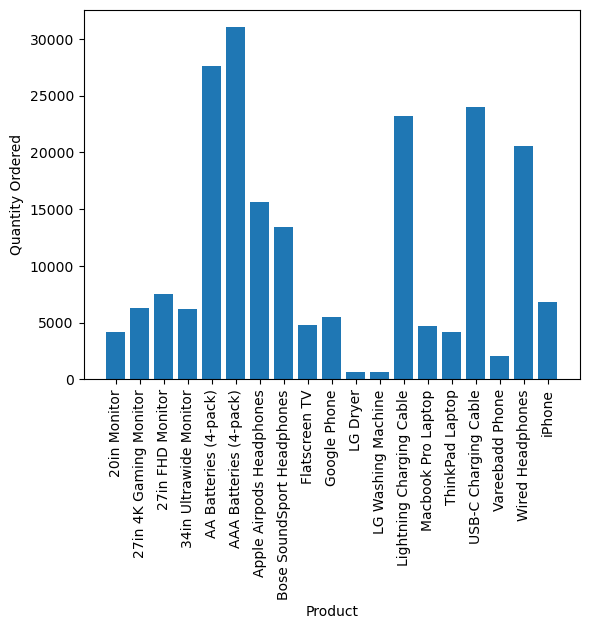

In [101]:
product_group = all_data.groupby("Product")[["Quantity Ordered", "Price Each", "Sales"]]
quantity_ordered = product_group.sum()["Quantity Ordered"]

products = [product for product, df in product_group]
plt.bar(products, quantity_ordered)
plt.ylabel("Quantity Ordered")
plt.xlabel("Product")
plt.xticks(products, rotation = "vertical", size= 10)
plt.show()



## Question 5 Answer : AAA Batteries (4-pack)